# Pytorch 연습 1주차

파이토치 사용법을 간단하게 알아보자

In [1]:
import torch
import numpy as np

## 머신러닝

순차 프로그래밍, 직관적인 코드 디자인, 성능도 좋다.   
머신러닝이란?
  
기계가 하는 추론!

머신러닝을 위해서는 데이터가 많이 필요합니다

최종적인 목표는 일반화가 잘 된 모델을 만들어서 입력에 따른 올바른 출력을 얻는 것!

머신러닝은 학습을 통해 성능을 개선하는 것을 말한다.

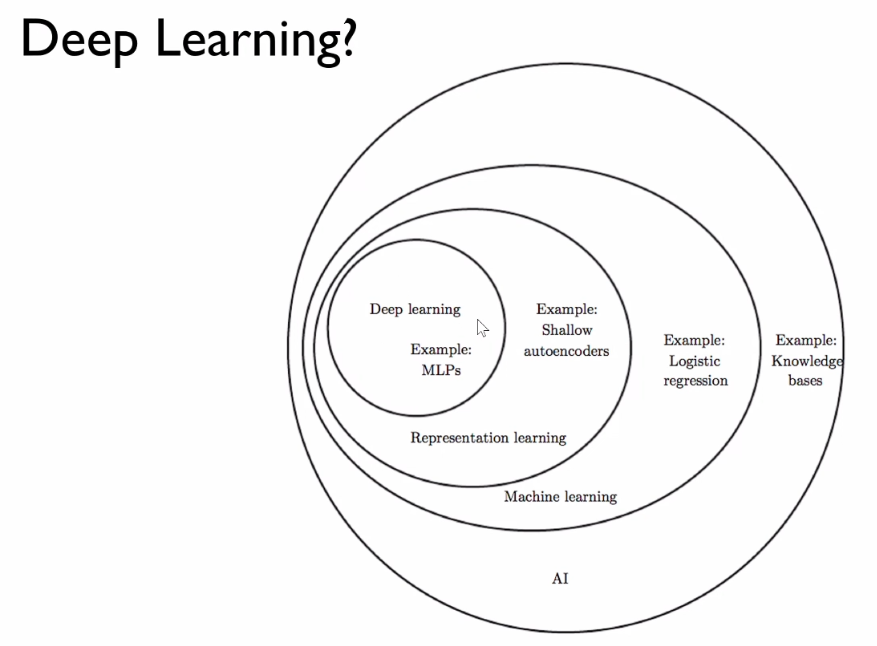... 

딥러닝은 아주 파워풀한 도구로 영향을 끼치고 있다.

도메인 지식이 좀 없어도 입력과 출력을 통한 최적의 특징을 만들어내기 때문에!
(Representation learning)

## 파이토치의 특징

1. tensor 계산을 GPU 가속을 통해서 가능하게 한다.
2. Type based auto-gradient 지원 -> 자동 미분을 계산한다!
3. Pythonic한 설계 철학을 가지고 있다.(간단, 디버그 easy)
4. NN에 특화되어있다.



# 파이토치 실습



### 모듈 임포트, 텐서 만들기

In [2]:
import matplotlib.pyplot as plt

x = torch.ones(3, 2)  # 3 x 2 의 1로 이루어진 행렬
y = torch.zeros(3,2)  # 3 x 2 의 0으로 이루어진 행렬
print(x)

tensor([[1., 1.],
        [1., 1.],
        [1., 1.]])


### 렌덤 변수, 초기화

In [3]:
torch.manual_seed(2)  # random한 값을 정하는 일종의 키워드

x = torch.rand(3, 2)  # 3 x 2 의 임의의 값을 표현하는 행렬
print(x)

x = torch.randn(3, 2)  # normal distribution 행렬
print(x)

tensor([[0.6147, 0.3810],
        [0.6371, 0.4745],
        [0.7136, 0.6190]])
tensor([[-2.1409, -0.5534],
        [-0.5000, -0.0815],
        [-0.1633,  1.5277]])


### 텐서의 슬라이스 (넘파이와 동일)

In [4]:
x = torch.tensor([[1, 2],
                  [3, 4],
                  [5, 6]])

print(x[:,1])  # column
print(x[0, :]) # row
print()

# reshape 하기
y = x.view(2, 3)  # 2 x 3 행렬로 바꾸기
print(y) 
print(x.view(6, -1)) # 알아서 계산해주기
print()

x = np.arange(1, 10)
print(x)
print(x[::-1])  # 순서를 거꾸로 해주는 약간 편리한 팁같은거

tensor([2, 4, 6])
tensor([1, 2])

tensor([[1, 2, 3],
        [4, 5, 6]])
tensor([[1],
        [2],
        [3],
        [4],
        [5],
        [6]])

[1 2 3 4 5 6 7 8 9]
[9 8 7 6 5 4 3 2 1]


### 텐서의 사칙연산

In [5]:
x = torch.ones([1,2])
y = np.ones([1, 2])
y = torch.from_numpy(y)  # 넘파이 어레이에서 텐서로 받기, 그냥 tensor로 선언해도 된다.
z = x.numpy()        # 넘파이로 보내주기

print(x + y)
print(torch.add(x, y))
print(x.add(y))
print(x, 'inplace 전')          # inpplace 연산 전
print(x.add_(y))  # inplace 연산 전, += 와 동일?
print(x, 'inplace 후')          # inplace 연산 후

tensor([[2., 2.]], dtype=torch.float64)
tensor([[2., 2.]], dtype=torch.float64)
tensor([[2., 2.]], dtype=torch.float64)
tensor([[1., 1.]]) inplace 전
tensor([[2., 2.]])
tensor([[2., 2.]]) inplace 후


### CUDA 지원

In [6]:
torch.cuda.device_count()   # 사용 가능 GPU 확인하기 (CUDA가 깔려있어야 함)

device = torch.device('cuda:0')  # 0번째 GPU handler
a = torch.ones(1,2, device=device)
b = torch.ones(1,2, device=device)
c = a + b
print(c)

c = c.cpu()  # to cpu
print(c)

tensor([[2., 2.]], device='cuda:0')
tensor([[2., 2.]])


### 자동미분

In [7]:
x = torch.ones([3,2], requires_grad=True)  # 자동미분 ON (내부적으로 관련된 변수 값을 다 저장)
print(x)

y = x + 5
print(y)
z = y * y
print(z)
t = torch.sum(z)
print('total value', t)

# 미분값을 출력하기 ( 가장 마지막 출력값에서 backward()를 통해서 구할 수 있다. )
t.backward()  # 미분하는 메서드 호출, out은 없다

print(x.grad)  # dt/dx = 2y + 1, y = x + 5 이니...

tensor([[1., 1.],
        [1., 1.],
        [1., 1.]], requires_grad=True)
tensor([[6., 6.],
        [6., 6.],
        [6., 6.]], grad_fn=<AddBackward0>)
tensor([[36., 36.],
        [36., 36.],
        [36., 36.]], grad_fn=<MulBackward0>)
total value tensor(216., grad_fn=<SumBackward0>)
tensor([[12., 12.],
        [12., 12.],
        [12., 12.]])


# Linear model
지도학습(supervised learning)은 데이터에 기반해서 모델을 완성하고 새로운 데이터를 분류하거나 추론하는 것. 

가장 간단하게 만들 수 있는 모델은 선형적인 모델이다.

y = w * x + b 

무작위한 값에서 점점 정확한 w를 찾아가는 과정

* 학습의 목적 함수를 최소화 하는 것으로 w를 업데이트 한다.

loss = (y_hat - y)^2 = (x * w - y)^2  ( mean을 취한다 )

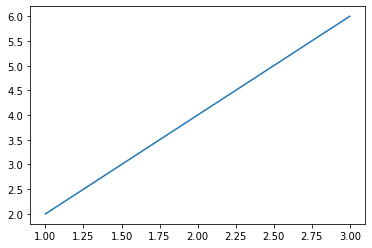

In [8]:
x_data = [1.0, 2.0, 3.0]
y_data = [2.0, 4.0, 6.0]

# 데이터 플롯하기
plt.plot(x_data, y_data)
plt.show()

In [9]:
w = 1.0  # 가중치 초기화

def forward(x): return x * w
def loss(x, y): return (forward(x) - y)**2  # mean sqeuared error 

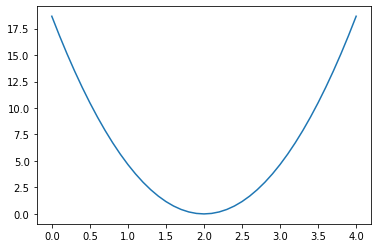

In [10]:
w_list = list()
mse_list = list()

for w in np.arange(0.0, 4.1, 0.1):
    #print('w = ',w)
    l_sum = 0
    
    for x_val, y_val in zip(x_data, y_data):
        y_pred = forward(x)
        l = loss(x_val, y_val)
        l_sum += l

        #print('\t {}, {}, {}, {:.4f}'.format(x_val, y_val, y_pred, l))
    
    w_list.append(w)
    mse_list.append(l_sum/3)

    #print('MSE = ', l_sum / 3)

plt.plot(w_list, mse_list) # MSE 플롯하기

# 경사하강

어딘가에서 w를 시작하고, 점진적으로 접근하기

오류를 줄이는 w를 찾는 것

argmin *loss(w)*

이때, 가중치의 업데이트는 기울기의 음수로 할 수 있기 때문에, w = w - a dl/dw로 구할 수 있다.

In [11]:
# gradient 함수만 새로 정의
def grad(x, y): return 2 * x * (x * w - y)  # loss 함수에 대한 w 미분

w = 1.0  # 가중치 초기화

for epoch in range(100):
    for x_val, y_val in zip(x_data, y_data):
        w_grad = grad(x_val, y_val)
        w -= 0.01 * w_grad
        if epoch % 10 == 0:
            print('\tgrad:', x_val, y_val, grad)
        l = loss(x_val, y_val)
        
    if epoch % 20 == 0:
        print('progress ', epoch, 'w = ', w, 'loss = ', l)

print('predice', forward(4))

	grad: 1.0 2.0 <function grad at 0x7f6a460620e0>
	grad: 2.0 4.0 <function grad at 0x7f6a460620e0>
	grad: 3.0 6.0 <function grad at 0x7f6a460620e0>
progress  0 w =  1.260688 loss =  4.919240100095999
	grad: 1.0 2.0 <function grad at 0x7f6a460620e0>
	grad: 2.0 4.0 <function grad at 0x7f6a460620e0>
	grad: 3.0 6.0 <function grad at 0x7f6a460620e0>
	grad: 1.0 2.0 <function grad at 0x7f6a460620e0>
	grad: 2.0 4.0 <function grad at 0x7f6a460620e0>
	grad: 3.0 6.0 <function grad at 0x7f6a460620e0>
progress  20 w =  1.998240525958391 loss =  2.7861740127856012e-05
	grad: 1.0 2.0 <function grad at 0x7f6a460620e0>
	grad: 2.0 4.0 <function grad at 0x7f6a460620e0>
	grad: 3.0 6.0 <function grad at 0x7f6a460620e0>
	grad: 1.0 2.0 <function grad at 0x7f6a460620e0>
	grad: 2.0 4.0 <function grad at 0x7f6a460620e0>
	grad: 3.0 6.0 <function grad at 0x7f6a460620e0>
progress  40 w =  1.9999958126624442 loss =  1.5780416225633037e-10
	grad: 1.0 2.0 <function grad at 0x7f6a460620e0>
	grad: 2.0 4.0 <function grad

### x^2 + x + b 구해보기


In [12]:
x_q_data = [1.0, 2.0, 4.0, 5.0, 7.0]
y_q_data = [1.0, 0.0, 4.0, 9.0, 25.0]

w1 = 1.0
w2 = 1.0
b0 = 4

for epoch in range(100):
    for x_val, y_val in zip(x_q_data, y_q_data):
        forwards = w1 * x_val ** 2 + w2 * x_val + b0  # forward propagation
        l = (forwards - y_val) ** 2   # Loss function
        
        w1_grad = 2 * (forwards - y_val) * x_val ** 2
        w2_grad = 2 * (forwards - y_val) * x_val

        w1 -= 0.001 * w1_grad  # 가중치 업데이트
        w2 -= 0.001 * w2_grad
        
    if epoch % 10 == 0:
        print('progress = {}, w1= {:.4f}, w2 = {:.4f}, loss = {:.4f}'.format(epoch,w1, w2, l))


progress = 0, w1= 1.6753, w2 = 0.9763, loss = 303.3170
progress = 10, w1= 1.8901, w2 = -0.9941, loss = 274.8341
progress = 20, w1= 1.5047, w2 = -2.2990, loss = 88.2402
progress = 30, w1= 1.2855, w2 = -3.0376, loss = 28.2458
progress = 40, w1= 1.1615, w2 = -3.4555, loss = 9.0414
progress = 50, w1= 1.0914, w2 = -3.6919, loss = 2.8941
progress = 60, w1= 1.0517, w2 = -3.8257, loss = 0.9264
progress = 70, w1= 1.0293, w2 = -3.9014, loss = 0.2965
progress = 80, w1= 1.0166, w2 = -3.9442, loss = 0.0949
progress = 90, w1= 1.0094, w2 = -3.9684, loss = 0.0304


# 파이토치의 auto_grad 연산

파이토치의 auto_grad 연산 = 연산을 graph와 chain rule을 사용하여 자동으로 미분을 구해줌.
backpropagation은 각각의 local gradient를 통해서 오차를 역전파 하는 것

In [13]:
x_data = [1, 2, 3]
y_data = [2, 4, 6]

w = torch.tensor([1.], requires_grad=True)  # auto-grad ON

def forward(x): return x * w                # model의 순방향 전파
def loss(x, y): return (forward(x)- y)**2   # model의 오차 함수

for epoch in range(10):
    for x_val, y_val in zip(x_data, y_data):
        y_pred = forward(x_val)
        l = loss(x_val, y_val)
        l.backward()    # Back propagation to update weight

        w.data = w.data - 0.01 * w.grad.item()  # weight update

        w.grad.data.zero_()  # weight gradient 초기화

    print(f'epoch{epoch}, loss{l.item()}, w = {w.item()}')

epoch0, loss7.315943717956543, w = 1.260688066482544
epoch1, loss3.9987640380859375, w = 1.4534177780151367
epoch2, loss2.1856532096862793, w = 1.5959051847457886
epoch3, loss1.1946394443511963, w = 1.7012479305267334
epoch4, loss0.6529689431190491, w = 1.779128909111023
epoch5, loss0.35690122842788696, w = 1.836707353591919
epoch6, loss0.195076122879982, w = 1.8792757987976074
epoch7, loss0.10662525147199631, w = 1.9107471704483032
epoch8, loss0.0582793727517128, w = 1.9340143203735352
epoch9, loss0.03185431286692619, w = 1.9512161016464233


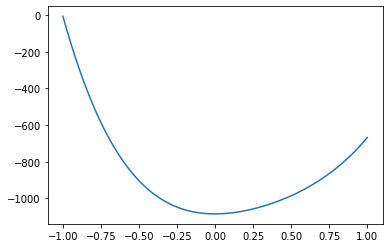

In [14]:
# 2차 함수의 미분 구해보기
w1 = torch.ones(1, requires_grad=True)
w2 = torch.ones(1, requires_grad=True)
x_ = torch.linspace(-1, 1, 1000)
y_ = torch.linspace(-2, 2, 1000)
b = 1

w1_grad = []
w2_grad = []
for x, y in zip(x_, y_):
    forwards = w2 * x ** 2 + w1 * x + b
    loss = (forwards - y) ** 2
    loss.backward()
    w1_grad.append(w1.grad.item())
    w2_grad.append(w2.grad.item())

plt.plot(x_, w1_grad)

# Linear Regression ( 선형 회귀 )

이차 미분 -> 헤시안 행렬을 쓰면 SGD를 쓰기 좋다고 한다. but, 역행렬이 어렵다고.

모델 만들기 프로세스
1. 디자인할 모델을 정하고, class와 variable을 정하기
2. 오차함수와 최적화 모델을 선정하기
3. 학습 시키기(forward, backward, update)


In [15]:
# data declare
x_data = torch.tensor([[1.], [2.], [3.]]) # 3 x 1 vector
y_data = torch.tensor([[2.], [4.], [6.]])

# model 만들기
import torch.nn as nn
class Model(nn.Module):  # 상속
    def __init__(self):  # 생성자 (오버라이딩)
        super(Model, self).__init__() # 부모 클래스(nn.Module) init 메서드 호출
        self.linear = nn.Linear(1,1)  # input 1, out 1,  y = x * w

    def forward(self, x):
        return self.linear(x)

# 모델 선언
model = Model()

# loss, optimizer 선언
criterion = nn.MSELoss(reduction='sum')  # mean squared error, sum은 평균을 안냄
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)  # SGD 옵티마이저 사용(weight updatae 방법)

# train loop
for epoch in range(100):
    # 1. 순방향 전파 구하기
    y_pred = model(x_data)

    # 2. loss 함수 구하기
    loss = criterion(y_pred, y_data)  # model out , Target data

    # 3. Zero-gradient and 가중치 업데이트
    optimizer.zero_grad()  # grad init to 0
    loss.backward()
    optimizer.step()

    if epoch % 10 == 0:
        print(f'{epoch} loss {loss.item()}')

0 loss 54.854248046875
10 loss 1.0731751918792725
20 loss 0.9143639802932739
30 loss 0.7911319732666016
40 loss 0.6845119595527649
50 loss 0.5922608375549316
60 loss 0.5124428868293762
70 loss 0.4433814585208893
80 loss 0.38362735509872437
90 loss 0.33192649483680725


# Logistic Regression

로지스틱 리그레션

binary prediction에 대해서?
두 가지 클래스로 인풋을 분류하는 문제

출력되는 y를 bool로 정의해준다.
또한, linear 함수에 sigmoid와 같은 활성화 함수를 적용하여 range 축소, 비선형성을 부여한다.

또한, 효과적인 loss 함수를 정의한다. -> cross entropy loss!

이 식의 의미는 yn log(yn_) - (1-yn) log (1-yn_) 이 된다.
두 가지 항은 각각 0에 가까울수록 커지거나, 1에 가까울수록 커지도록 하는 역할을 한다. 이는 이항 분류에 더 적합함을 알 수 있다.

(로그 함수의 범위가 [0, 1] 이므로)



In [16]:
# declare data
x_data = torch.tensor([1., 2., 3., 4.]).view(4,-1)
y_data = torch.tensor([0., 0., 1., 1.]).view(4,1)

# model 만들기
class Model(nn.Module): 
    def __init__(self):  
        super(Model, self).__init__()  
        self.linear = nn.Linear(1,1)  

    def forward(self, x):
        # 시그모이드 함수의 경우 vanishing gradient라는 문제가 생긴다
        # CELU, RELU등의 활성화 함수를 사용할 수 있다.
        y_pred = nn.functional.sigmoid(self.linear(x))
        return y_pred

# 모델 선언
model = Model()

# loss, optimizer 선언
criterion = nn.BCELoss(size_average=True)  # binary로 결과를 가져오는, y를 one-hot-vector를 사용
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)  # SGD 옵티마이저 사용(weight updatae 방법)

# train loop
for epoch in range(100):
    # 1. 순방향 전파 구하기
    y_pred = model(x_data)

    # 2. loss 함수 구하기
    loss = criterion(y_pred, y_data)  # model out , Target data

    # 3. Zero-gradient and 가중치 업데이트
    optimizer.zero_grad()  # grad init to 0
    loss.backward()
    optimizer.step()

    if epoch % 10 == 0:
        print(f'{epoch} loss {loss.item()}')

# after train
print(f'result {model(torch.tensor([1.0]))}')  # 결과값에 따라 0.5  > 이면 True, 0.5< 이면 false

0 loss 1.8708420991897583
10 loss 1.618600606918335
20 loss 1.3925265073776245
30 loss 1.1988229751586914
40 loss 1.0418015718460083
50 loss 0.9218775033950806
60 loss 0.8350778222084045
70 loss 0.774646520614624
80 loss 0.7334080338478088
90 loss 0.705333948135376
result tensor([0.5309], grad_fn=<SigmoidBackward>)


/usr/local/lib/python3.7/dist-packages/torch/nn/_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1639: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


### 여러 개의 레이어를 쓰고 하는 법

여러 가지 인풋을 통한 아웃풋을 예측하기
이를 위해서는 다양한 레이어를 디자인 해야 한다.

> Wide : 특징을 늘린다

> Deep : 레이어를 쌓는다
이때, 레이어간 차원을 연결해주는 것이 중요하다.

In [89]:
# 당뇨 예측 데이터
from sklearn.datasets import load_diabetes
import torch.nn.functional as F

datasets = load_diabetes()

x_data = datasets.data
x_data = torch.tensor(x_data[:, 0:8]).float()

y_data = datasets.target
y_data = torch.tensor(y_data).float()
# y_train = torch.tensor([int(x) for x in mnist.target[:60000]])

for idx, y in enumerate(y_data):
    if y > torch.max(y_data)/2:
        y_data[idx] = True
    else:
        y_data[idx] = False

y_data = y_data.view([442, 1])
print(x_data.shape)
print(y_data.shape)
print(x_data[0:5])

# model 만들기
class Model_diabete(nn.Module): 
    def __init__(self):  
        super().__init__()  
        self.l1 = nn.Linear(8, 10)
        self.l2 = nn.Linear(10, 6)
        self.l3 = nn.Linear(6, 4)
        self.l4 = nn.Linear(4, 1)
        self.sigmoid = nn.Tanh()

    def forward(self, x):
        y1 = self.sigmoid(self.l1(x))
        y2 = self.sigmoid(self.l2(y1))
        y3 = self.sigmoid(self.l3(y2))
        y_pred = self.sigmoid(self.l4(y3))
        return y_pred

model = Model_diabete()
print(model)

# loss, optimizer 선언
criterion = nn.BCELoss(size_average=True)  # binary로 결과를 가져오는, y를 one-hot-vector를 사용
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)  # SGD 옵티마이저 사용(weight updatae 방법)

# train loop
for epoch in range(100):
    # 1. 순방향 전파 구하기
    y_pred = model(x_data)

    # 2. loss 함수 구하기
    loss = criterion(y_pred, y_data)  # model out , Target data

    # 3. Zero-gradient and 가중치 업데이트
    optimizer.zero_grad()  # grad init to 0
    loss.backward()
    optimizer.step()

    if epoch % 10 == 0:
        print(f'{epoch} loss {loss.item()}')

# after train
test = torch.tensor([0.0381,  0.0507,  0.0617,  0.0219, -0.0442, -0.0348, -0.0434, -0.0026]) + 0.01

print(f'result {model(test)}') 

torch.Size([442, 8])
torch.Size([442, 1])
tensor([[ 0.0381,  0.0507,  0.0617,  0.0219, -0.0442, -0.0348, -0.0434, -0.0026],
        [-0.0019, -0.0446, -0.0515, -0.0263, -0.0084, -0.0192,  0.0744, -0.0395],
        [ 0.0853,  0.0507,  0.0445, -0.0057, -0.0456, -0.0342, -0.0324, -0.0026],
        [-0.0891, -0.0446, -0.0116, -0.0367,  0.0122,  0.0250, -0.0360,  0.0343],
        [ 0.0054, -0.0446, -0.0364,  0.0219,  0.0039,  0.0156,  0.0081, -0.0026]])
Model_diabete(
  (l1): Linear(in_features=8, out_features=10, bias=True)
  (l2): Linear(in_features=10, out_features=6, bias=True)
  (l3): Linear(in_features=6, out_features=4, bias=True)
  (l4): Linear(in_features=4, out_features=1, bias=True)
  (sigmoid): Tanh()
)
0 loss 0.8298004865646362
10 loss 0.6965972781181335
20 loss 0.6765178442001343
30 loss 0.6707442402839661
40 loss 0.6687526702880859
50 loss 0.6679799556732178
60 loss 0.667636513710022
70 loss 0.6674512624740601
80 loss 0.6673257350921631
90 loss 0.6672227382659912
result tenso

/usr/local/lib/python3.7/dist-packages/torch/nn/_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


# Apendex: JAX

JAX는 google에서 만든 선형대수/ 수학용 라이브러리로, jit 컴파일러, gpu연산 등을 지원한다!
엄청 빠름 


In [60]:
import jax
import jax.numpy as jnp

# set parameters
mm = 1e-3
um = mm * mm
nm = mm * um

pp = 3.45 * 2 * um
res = 1024
k = 2 * np.pi / (525*nm)


def RS_np(point_clouds):
    result = np.zeros((1024, 1024), dtype=np.complex)

    X = np.linspace(-pp*res/2, pp*res/2, num=1024)
    Y = np.linspace(-pp*res/2, pp*res/2, num=1024)
    X, Y = np.meshgrid(X, Y)

    for i in range(len(point_clouds)):
        phase = 0
        x = point_clouds[i, 0] * 1e-3
        y = point_clouds[i, 1] * 1e-3
        z = abs(point_clouds[i, 2])

        # Run FPZ
        phase = np.power(X-x, 2) + np.power(Y-y, 2)
        phase *= k / (2 * z)

        result += np.exp(1j*phase)
    
    return np.angle(result)


def RS_holo(point_clouds):
    """Angle part hologram from point cloud coordinate"""
    result = jnp.zeros((1024, 1024))

    X = jnp.linspace(-pp*res/2, pp*res/2, 1024)
    Y = jnp.linspace(-pp*res/2, pp*res/2, 1024)
    X, Y = jnp.meshgrid(X, Y)

    for i in range(len(point_clouds)):
        phase = 0
        x = point_clouds[i, 0] * 1e-3
        y = point_clouds[i, 1] * 1e-3
        z = abs(point_clouds[i, 2])

        # Run FPZ
        phase = jnp.power(X-x, 2) + jnp.power(Y-y, 2)
        phase *= k / (2 * z)

        result += jnp.exp(1j*phase)
    
    return jnp.angle(result)

CPU times: user 22.1 s, sys: 52.8 ms, total: 22.2 s
Wall time: 22.2 s
CPU times: user 791 ms, sys: 245 ms, total: 1.04 s
Wall time: 737 ms
CPU times: user 3.98 s, sys: 1.05 s, total: 5.04 s
Wall time: 3.65 s
CPU times: user 1.31 ms, sys: 0 ns, total: 1.31 ms
Wall time: 927 µs
CPU times: user 0 ns, sys: 632 µs, total: 632 µs
Wall time: 450 µs


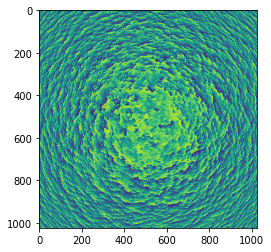

In [90]:
# input data
pc_ex = np.random.randn(256,3)

# numpy 함수 실행
%time result = RS_np(pc_ex)

# JAX 함수 실행
%time RS_holo(pc_ex)

# GPU 연산
pc_gpu = jax.device_put(pc_ex)
%time RS_holo(pc_gpu)

# jit compiler
RS_jit = jax.jit(RS_holo)
%time RS_jit(pc_ex)

# jit + GPU
%time RS_jit(pc_gpu)

# 함수 시각화
plt.imshow(result)
plt.show()
